# Case study for the g-and-k distribution 

We will now use veriues network arichtetures to learn the summary statisitics for the G-and-k distribution. The network archtitures that we will consider are: MLP, MLP with data pre-processing, and DeepSets.

#### The G-and-k distribution 

### Setup

In [1]:
# set path
cd("..") # set correct working directory 
pwd() # this path should go to the folder with the .git file 

# load packages
using Pkg
using PyPlot
using DataFrames
using CSV
using Distributions
using KernelDensity 

# include files
include(pwd()*"/src/g and k dist/set_up.jl")

# load data
y_test = Matrix(CSV.read("data/gandk/y_test.csv"; allowmissing=:auto));


Loading g-and-k model


Calc exact posterior resutls 

In [2]:
chain = Matrix(CSV.read("data/gandk/exact_inference_post.csv"; allowmissing=:auto))

# calc grid for prior dist
x_grid = -0.5:0.01:10.5

# calc prior dist
priordensity1 = pdf.(Gamma(2,1), x_grid)
priordensity2 = pdf.(Gamma(2,1), x_grid)
priordensity3 = pdf.(Gamma(2,0.5), x_grid)
priordensity4 = pdf.(Gamma(2,1), x_grid)

# exact inference

h1_exact = kde(chain[:,1])
h2_exact = kde(chain[:,2])
h3_exact = kde(chain[:,3])
h4_exact = kde(chain[:,4]);


## Network performance

### Results using ABC with hand-pricked summary stats

Load results 

In [3]:
posterior_summary_stats = Matrix(CSV.read("data/gandk/abcrs_post.csv"; allowmissing=:auto));

#### Posterior inference  

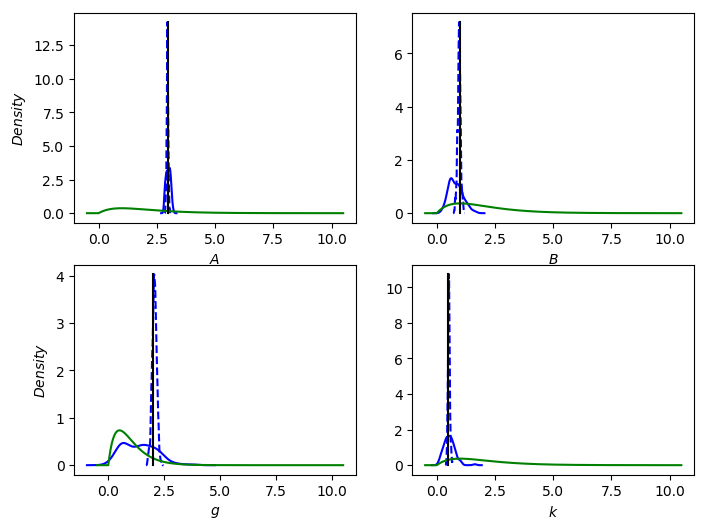

In [4]:
h1 = kde(posterior_summary_stats[:,1])
h2 = kde(posterior_summary_stats[:,2])
h3 = kde(posterior_summary_stats[:,3])
h4 = kde(posterior_summary_stats[:,4])

PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.ylabel(L"Density")
PyPlot.xlabel(L"$A$")
PyPlot.subplot(222)
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot(x_grid,priordensity2, "g")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$B$")
PyPlot.subplot(223)
PyPlot.plot(h3_exact.x,h3_exact.density, "b--")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(x_grid,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3_exact.density)), "k")
PyPlot.xlabel(L"$g$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(224)
PyPlot.plot(h4_exact.x,h4_exact.density, "b--")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot(x_grid,priordensity4, "g")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4_exact.density)), "k")
PyPlot.xlabel(L"$k$");


### Results using MLP

#### Network info

Structure: 1000 (input) -> 100 -> 100 -> 50 -> 4 (output)

Number weights: 115454

Training time: 2509.89 sec. (41 min) 

ABC runtime: 23.73 sec. (0.39 min)

Load results. 

In [5]:
loss_training_dnn_large = Matrix(CSV.read("data/gandk/loss_vec_training_simple_DNN_small_1.csv"; allowmissing=:auto))
loss_val_dnn_large = Matrix(CSV.read("data/gandk/loss_vec_val_simple_DNN_small_1.csv"; allowmissing=:auto))
predictions_dnn_large = Matrix(CSV.read("data/gandk/predictions_simple_DNN_small_1.csv"; allowmissing=:auto))
posterior_simple_DNN_large = Matrix(CSV.read("data/gandk/abcrs_post_simple_DNN_small_1.csv"; allowmissing=:auto));

#### Network performance  

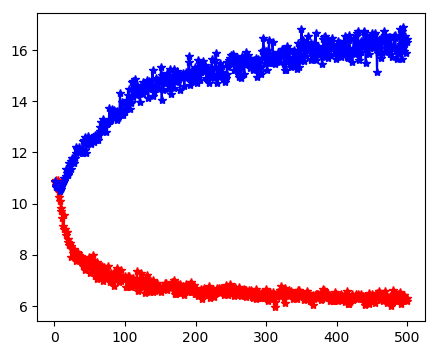

In [6]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_large), loss_training_dnn_large[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_large), loss_val_dnn_large[:], "*-b");

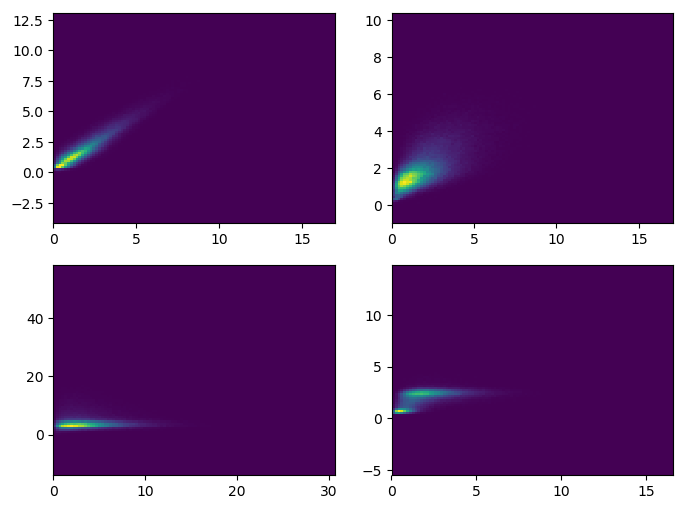

In [7]:
# plot predictions
PyPlot.figure(figsize=(8,6))
ax1 = PyPlot.subplot(2,2,1)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_large[:,1], bins=(100, 100))
ax1 = PyPlot.subplot(2,2,2)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_large[:,2], bins=(100, 100))
ax1 = PyPlot.subplot(2,2,3)
PyPlot.plt[:hist2d](y_test[:,3], predictions_dnn_large[:,3], bins=(100, 100))
ax1 = PyPlot.subplot(2,2,4)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_large[:,4], bins=(100, 100));

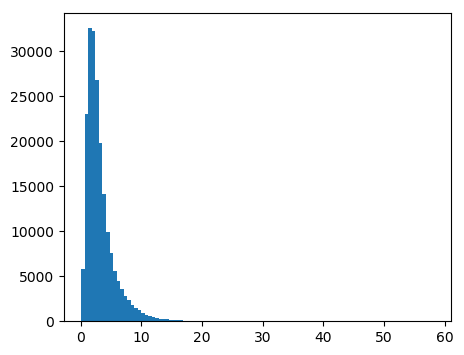

In [8]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_large - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

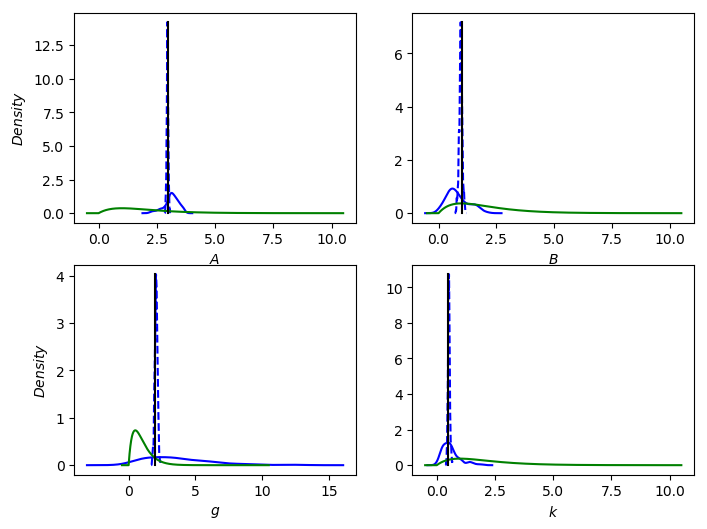

PyObject Text(0.5,25,'$k$')

In [9]:
# simple DNN large
h1 = kde(posterior_simple_DNN_large[:,1])
h2 = kde(posterior_simple_DNN_large[:,2])
h3 = kde(posterior_simple_DNN_large[:,3])
h4 = kde(posterior_simple_DNN_large[:,4])

PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.ylabel(L"Density")
PyPlot.xlabel(L"$A$")
PyPlot.subplot(222)
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot(x_grid,priordensity2, "g")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$B$")
PyPlot.subplot(223)
PyPlot.plot(h3_exact.x,h3_exact.density, "b--")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(x_grid,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3_exact.density)), "k")
PyPlot.xlabel(L"$g$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(224)
PyPlot.plot(h4_exact.x,h4_exact.density, "b--")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot(x_grid,priordensity4, "g")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4_exact.density)), "k")
PyPlot.xlabel(L"$k$")


### Results using MLP w. data preprocessing (emperical distribution function)

#### Network info

Structure: 100 (input) -> 100 -> 100 -> 50 -> 4 (output)

Number weights: 25454 

Training time: 2097.84 sec. (34.95 min)

ABC runtime: 15.23 sec. (0.25 min)

Load results. 

In [10]:
loss_training_dnn_timseries_data = Matrix(CSV.read("data/gandk/loss_vec_training_dnn_timseries_data_1.csv"; allowmissing=:auto))
loss_val_dnn_timseries_data = Matrix(CSV.read("data/gandk/loss_vec_val_dnn_timseries_data_1.csv"; allowmissing=:auto))
predictions_dnn_timseries_data = Matrix(CSV.read("data/gandk/predictions_dnn_timseries_data_1.csv"; allowmissing=:auto))
posterior_timeseries_data = Matrix(CSV.read("data/gandk/abcrs_post_dnn_timseries_data_1.csv"; allowmissing=:auto));

#### Network performance  

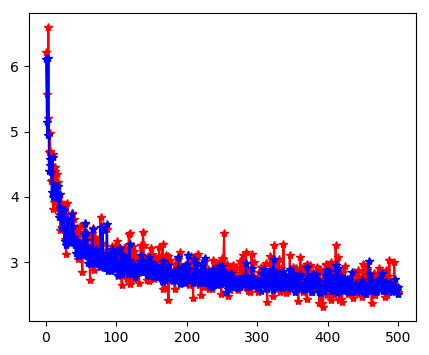

In [11]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_training_dnn_timseries_data[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_val_dnn_timseries_data[:], "*-b");

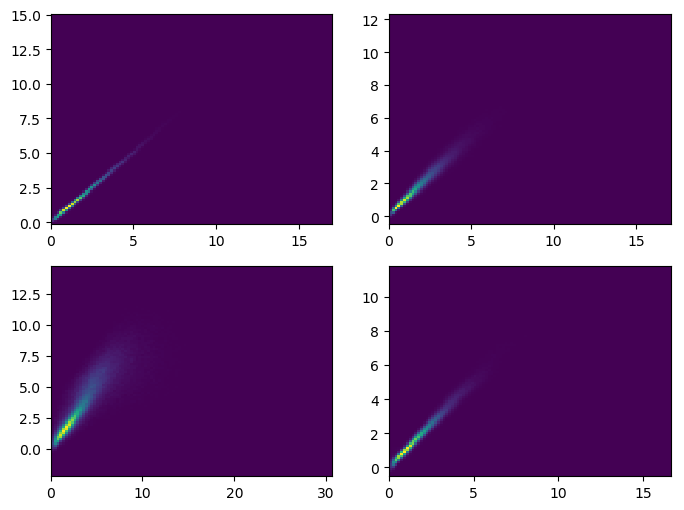

In [12]:
# plot predictions
PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_timseries_data[:,1], bins=(100, 100))
PyPlot.subplot(222)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_timseries_data[:,2], bins=(100, 100))
PyPlot.subplot(223)
PyPlot.plt[:hist2d](y_test[:,3], predictions_dnn_timseries_data[:,3], bins=(100, 100))
PyPlot.subplot(224)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_timseries_data[:,4], bins=(100, 100));

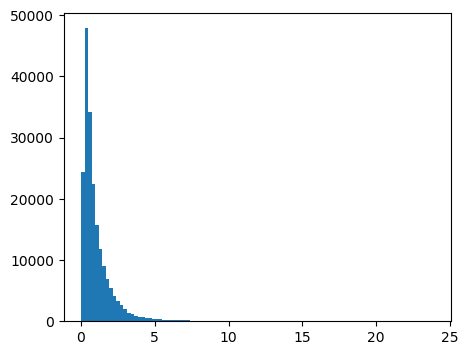

In [13]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_timseries_data - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

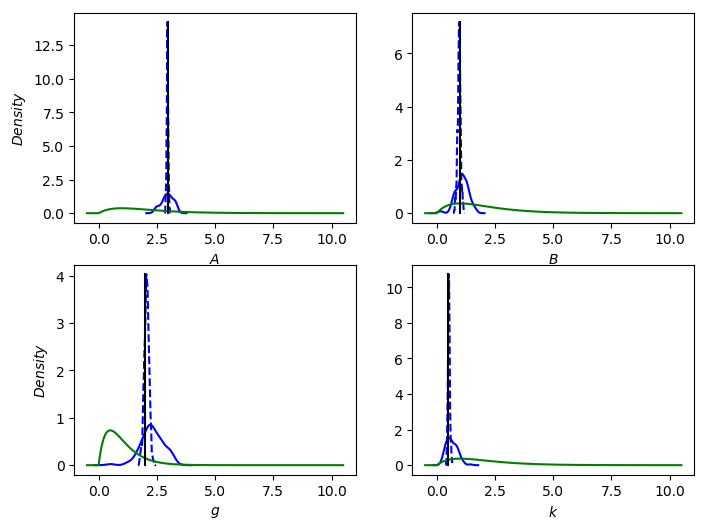

In [14]:

# simple DNN timeseries data
h1 = kde(posterior_timeseries_data[:,1])
h2 = kde(posterior_timeseries_data[:,2])
h3 = kde(posterior_timeseries_data[:,3])
h4 = kde(posterior_timeseries_data[:,4])

PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.ylabel(L"Density")
PyPlot.xlabel(L"$A$")
PyPlot.subplot(222)
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot(x_grid,priordensity2, "g")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$B$")
PyPlot.subplot(223)
PyPlot.plot(h3_exact.x,h3_exact.density, "b--")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(x_grid,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3_exact.density)), "k")
PyPlot.xlabel(L"$g$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(224)
PyPlot.plot(h4_exact.x,h4_exact.density, "b--")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot(x_grid,priordensity4, "g")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4_exact.density)), "k")
PyPlot.xlabel(L"$k$");

### Results using DeepSets 

#### Network info

Structure: 1000 (input) -> 100 -> 50 -> 10 (output inner), summation, then 10 (input outer) -> 100 -> 100 -> 50 -> 2 (output)

Number weights: 22214

Training time: 52312.34 sec. (14.53 h)

ABC runtime: 254.71 sec. (4.25 min)

Load results. 

In [15]:
loss_training_deepsets = Matrix(CSV.read("data/gandk/loss_vec_training_deepsets_1.csv"; allowmissing=:auto))
loss_val_deepsets = Matrix(CSV.read("data/gandk/loss_vec_val_deepsets_1.csv"; allowmissing=:auto))
predictions_deepsets = Matrix(CSV.read("data/gandk/predictions_deepsets_1.csv"; allowmissing=:auto))
posterior_deepsets = Matrix(CSV.read("data/gandk/abcrs_post_deepsets_1.csv"; allowmissing=:auto));

#### Network performance  

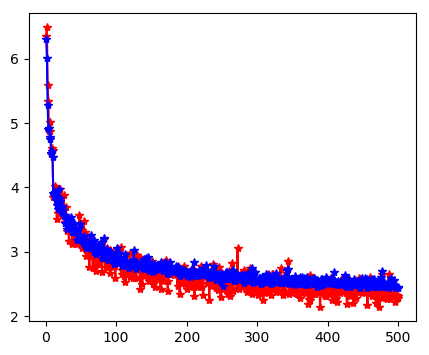

In [16]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_deepsets), loss_training_deepsets[:], "*-r")
PyPlot.plot(1:length(loss_training_deepsets), loss_val_deepsets[:], "*-b");

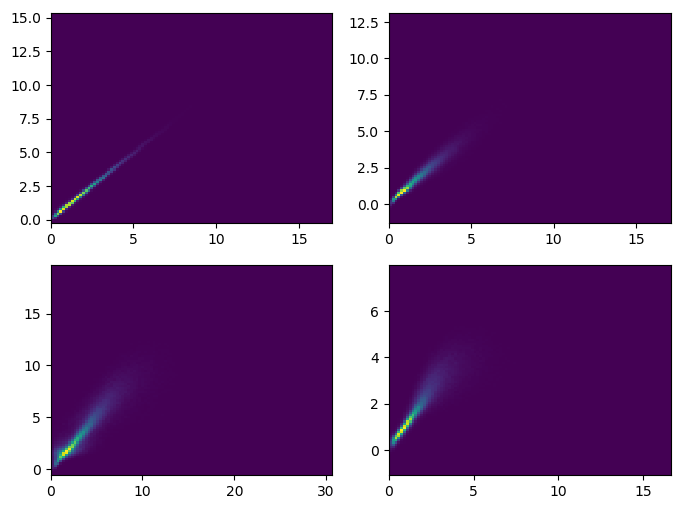

In [17]:
# plot predictions
PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plt[:hist2d](y_test[:,1], predictions_deepsets[:,1], bins=(100, 100))
PyPlot.subplot(222)
PyPlot.plt[:hist2d](y_test[:,2], predictions_deepsets[:,2], bins=(100, 100))
PyPlot.subplot(223)
PyPlot.plt[:hist2d](y_test[:,3], predictions_deepsets[:,3], bins=(100, 100))
PyPlot.subplot(224)
PyPlot.plt[:hist2d](y_test[:,4], predictions_deepsets[:,4], bins=(100, 100));

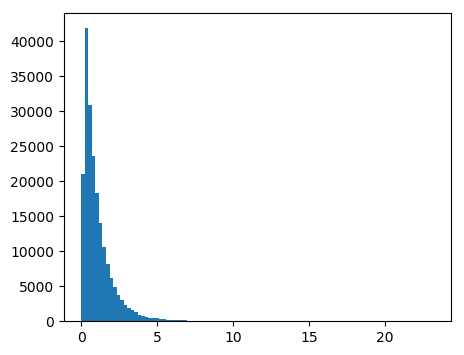

In [18]:
# check pred error
loss_test = sqrt.(sum((predictions_deepsets - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

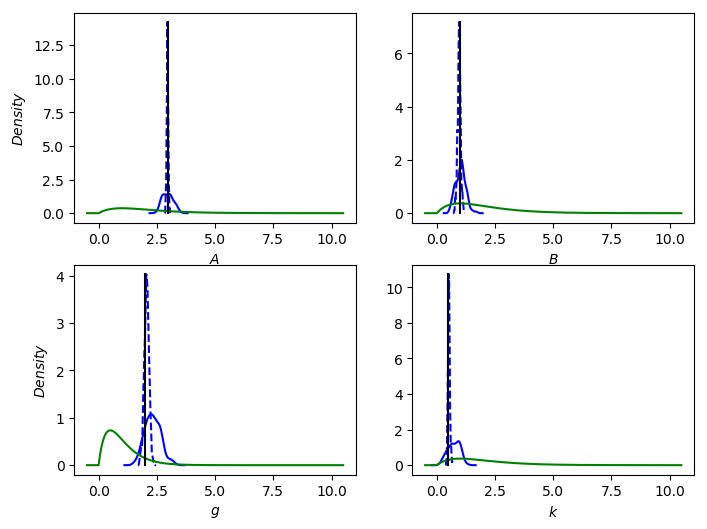

PyObject Text(0.5,25,'$k$')

In [19]:
#  DNN deepsets
h1 = kde(posterior_deepsets[:,1])
h2 = kde(posterior_deepsets[:,2])
h3 = kde(posterior_deepsets[:,3])
h4 = kde(posterior_deepsets[:,4])

PyPlot.figure(figsize=(8,6))
PyPlot.subplot(221)
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.ylabel(L"Density")
PyPlot.xlabel(L"$A$")
PyPlot.subplot(222)
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot(x_grid,priordensity2, "g")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$B$")
PyPlot.subplot(223)
PyPlot.plot(h3_exact.x,h3_exact.density, "b--")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(x_grid,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3_exact.density)), "k")
PyPlot.xlabel(L"$g$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(224)
PyPlot.plot(h4_exact.x,h4_exact.density, "b--")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot(x_grid,priordensity4, "g")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4_exact.density)), "k")
PyPlot.xlabel(L"$k$")

## Posterior inference results 

Set up.

In [20]:
include(pwd()*"/src/utilities/multivar_cramer.jl")

A_true, B_true, g_true, k_true = θ_true
A_true_posterior, B_true_posterior, g_true_posterior, k_true_posterior = mean(chain,dims=1)

1×4 Array{Float64,2}:
 2.95574  0.956376  2.0622  0.521118

## Exact posterior 

In [21]:
posterior_exact = Array(Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_exact.csv"; allowmissing=:auto))');

## ABC with hand-pricked summary stats

Posterior mean loss and true paramter loss for ABC.

In [22]:
posterior = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

A_hat = mean(posterior[1:4:end,:],dims=1)
B_hat = mean(posterior[2:4:end,:],dims=1)
g_hat = mean(posterior[3:4:end,:],dims=1)
k_hat = mean(posterior[4:4:end,:],dims=1)

# loss

println("posterior mean loss:")
println(sqrt(mean((A_hat.-A_true).^2)))
println(sqrt(mean((B_hat.-B_true).^2)))
println(sqrt(mean((g_hat.-g_true).^2)))
println(sqrt(mean((k_hat.-k_true).^2)))

posterior mean loss:
0.07169905506171351
0.12119002805356481
3.21676885520777
1.1036514849814965


Calc multivariate Cramer test statistics.

In [23]:
test_stats_abc = zeros(size(posterior,2))
idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_abc[idx] = multvar_cramer_stat(posterior[i:i+3,:],posterior_exact[i:i+3,1:500])
end


## Small MLP

Posterior mean loss and true paramter loss for small MLP.

In [24]:
posterior = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_1.csv"; allowmissing=:auto))

A_hat = mean(posterior[1:4:end,:],dims=1)
B_hat = mean(posterior[2:4:end,:],dims=1)
g_hat = mean(posterior[3:4:end,:],dims=1)
k_hat = mean(posterior[4:4:end,:],dims=1)

# loss

println("posterior mean loss:")
println(sqrt(mean((A_hat.-A_true).^2)))
println(sqrt(mean((B_hat.-B_true).^2)))
println(sqrt(mean((g_hat.-g_true).^2)))
println(sqrt(mean((k_hat.-k_true).^2)))

posterior mean loss:
0.05723355497754967
0.1278315210345258
2.077586628277422
0.1316164654321208


Calc multivariate Cramer test statistics.

In [25]:
test_stats_small_mlp = zeros(size(posterior,2))
idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_small_mlp[idx] = multvar_cramer_stat(posterior[i:i+3,:],posterior_exact[i:i+3,1:500])
end


## MLP with preprocessing

Posterior mean loss and true paramter loss for timeseries network.

In [26]:
posterior = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_1.csv"; allowmissing=:auto))

A_hat = mean(posterior[1:4:end,:],dims=1)
B_hat = mean(posterior[2:4:end,:],dims=1)
g_hat = mean(posterior[3:4:end,:],dims=1)
k_hat = mean(posterior[4:4:end,:],dims=1)

# loss

println("posterior mean loss:")
println(sqrt(mean((A_hat.-A_true).^2)))
println(sqrt(mean((B_hat.-B_true).^2)))
println(sqrt(mean((g_hat.-g_true).^2)))
println(sqrt(mean((k_hat.-k_true).^2)))

posterior mean loss:
0.09523327670040506
0.11211119351394157
0.14321040960589293
0.1434474051397308


Calc multivariate Cramer test statistics.

In [27]:
test_stats_timeseries = zeros(size(posterior,2))
idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_timeseries[idx] = multvar_cramer_stat(posterior[i:i+3,:], posterior_exact[i:i+3,1:500])
end


## Deepsets

Posterior mean loss and true paramter loss for Deepsets.

In [28]:
posterior = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_1.csv"; allowmissing=:auto))

A_hat = mean(posterior[1:4:end,:],dims=1)
B_hat = mean(posterior[2:4:end,:],dims=1)
g_hat = mean(posterior[3:4:end,:],dims=1)
k_hat = mean(posterior[4:4:end,:],dims=1)

# loss

println("posterior mean loss:")
println(sqrt(mean((A_hat.-A_true).^2)))
println(sqrt(mean((B_hat.-B_true).^2)))
println(sqrt(mean((g_hat.-g_true).^2)))
println(sqrt(mean((k_hat.-k_true).^2)))

posterior mean loss:
0.10784937253220138
0.11477680065335855
0.10761094770535191
0.2106702128019752


Calc multivariate Cramer test statistics.

In [29]:
test_stats_deepsets = zeros(size(posterior,2))
idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_deepsets[idx] = multvar_cramer_stat(posterior[i:i+3,:],posterior_exact[i:i+3,1:500])
end

#### Compare multivariate Cramer test statistics

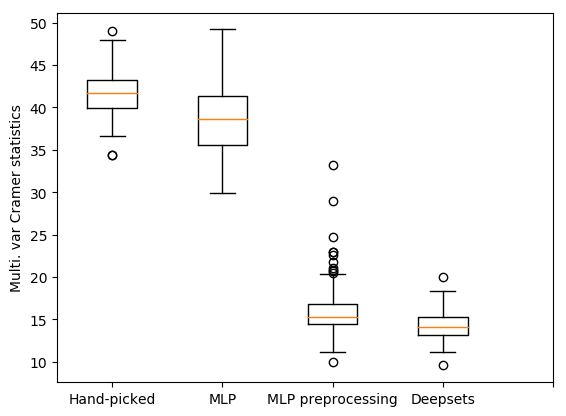

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [30]:
data = zeros(length(test_stats_abc),4)

data[:,1] = test_stats_abc
data[:,2] = test_stats_small_mlp
data[:,3] = test_stats_timeseries
data[:,4] = test_stats_deepsets

PyPlot.figure()
PyPlot.boxplot(data)
PyPlot.xticks([1, 2, 3, 4, 5], ["Hand-picked", "MLP", "MLP preprocessing", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

## Network performance with different traning data size

Load results for small MLP, large MLP, timeseries, and Deepsets.

In [31]:
posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_4.csv"; allowmissing=:auto))

test_stats_DNN_small_2 = zeros(size(posterior,2))
test_stats_DNN_small_3 = zeros(size(posterior,2))
test_stats_DNN_small_4 = zeros(size(posterior,2))


idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_DNN_small_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_small_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_small_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end

posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_4.csv"; allowmissing=:auto))

test_stats_timeseries_2 = zeros(size(posterior,2))
test_stats_timeseries_3 = zeros(size(posterior,2))
test_stats_timeseries_4 = zeros(size(posterior,2))

idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_timeseries_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_timeseries_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_timeseries_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end


posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_4.csv"; allowmissing=:auto))

test_stats_deepsets_2 = zeros(size(posterior,2))
test_stats_deepsets_3 = zeros(size(posterior,2))
test_stats_deepsets_4 = zeros(size(posterior,2))

idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_deepsets_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_deepsets_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_deepsets_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end


Store test statistics in matrices. 

In [32]:
data2 = zeros(length(test_stats_abc),3)

data2[:,1] = test_stats_DNN_small_2
data2[:,2] = test_stats_timeseries_2
data2[:,3] = test_stats_deepsets_2

data3 = zeros(length(test_stats_abc),3)

data3[:,1] = test_stats_DNN_small_3
data3[:,2] = test_stats_timeseries_3
data3[:,3] = test_stats_deepsets_3

data4 = zeros(length(test_stats_abc),3)

data4[:,1] = test_stats_DNN_small_4
data4[:,2] = test_stats_timeseries_4
data4[:,3] = test_stats_deepsets_4

data_mean_stats = [mean(data[:,2:end],dims=1); mean(data2,dims=1); mean(data3,dims=1); mean(data4,dims=1)];
data_std_stats = [std(data[:,2:end],dims=1); std(data2,dims=1); std(data3,dims=1); std(data4,dims=1)];

Compare results training on 5*10^5 observations. 

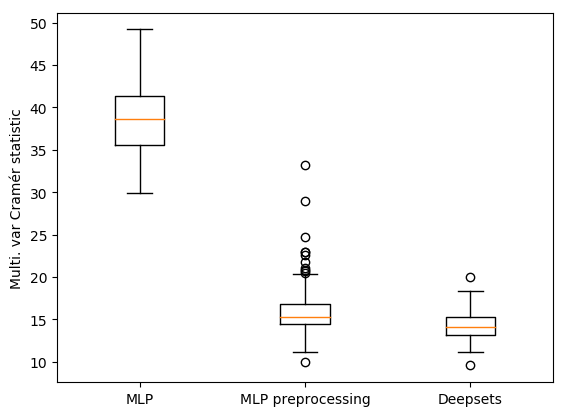

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [33]:
PyPlot.figure()
PyPlot.boxplot(data[:,2:end])
PyPlot.xticks([1, 2, 3], ["MLP", "MLP preprocessing", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^5 observations. 

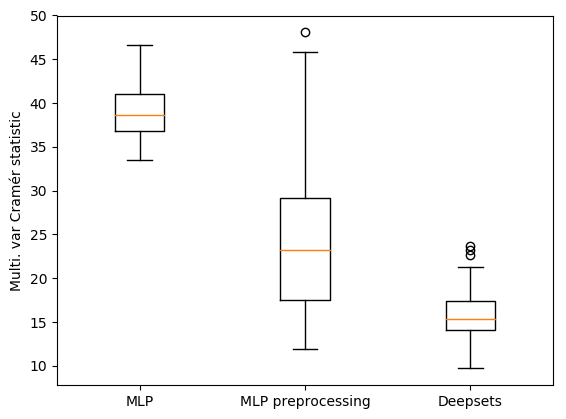

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [34]:
PyPlot.figure()
PyPlot.boxplot(data2)
PyPlot.xticks([1, 2, 3], ["MLP", "MLP preprocessing", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^4 observations. 

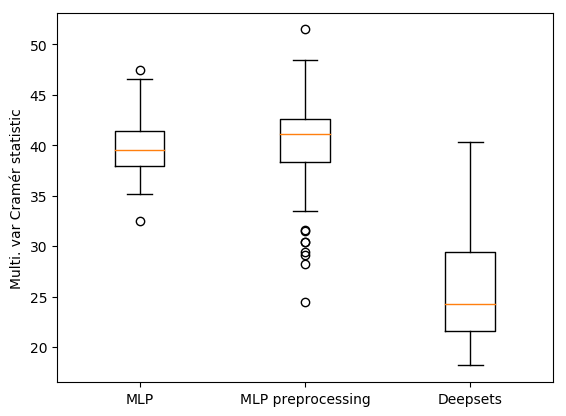

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [35]:
PyPlot.figure()
PyPlot.boxplot(data3)
PyPlot.xticks([1, 2, 3], ["MLP", "MLP preprocessing", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^3 observations. 

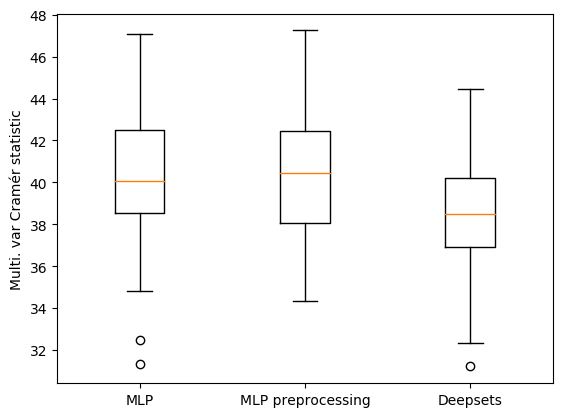

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [36]:
PyPlot.figure()
PyPlot.boxplot(data4)
PyPlot.xticks([1, 2, 3], ["MLP", "MLP preprocessing", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Plot multi. var Cramer statistics as function of the training data size. Blue line  MLP, red line MLP w preprocessing, green line Deepsets.

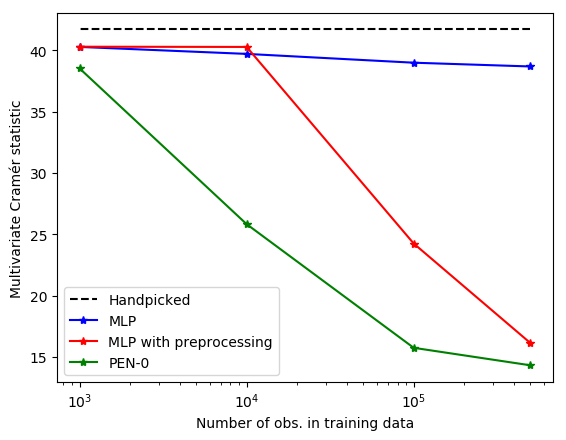

In [37]:
# plotting
x_scale = [5*10^5, 10^5, 10^4, 10^3]

PyPlot.figure()
PyPlot.semilogx(x_scale,[mean(data[:,1]);mean(data[:,1]);mean(data[:,1]);mean(data[:,1])], "--k",label="Model length")
PyPlot.semilogx(x_scale, data_mean_stats[:,1], "*-b")
PyPlot.semilogx(x_scale, data_mean_stats[:,2], "*-r")
PyPlot.semilogx(x_scale, data_mean_stats[:,3], "*-g")
PyPlot.xlabel("Number of obs. in training data")
PyPlot.ylabel("Multivariate Cramér statistic")
PyPlot.legend(("Handpicked","MLP","MLP with preprocessing","PEN-0"))
PyPlot.savefig("figures/res_gandk.eps", format="eps", dpi=1000)